In [1]:
import tensorflow as tf

tf.__version__

'2.2.0'

We'll use the diabetes dataset from sklearn.

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabetes_set = load_diabetes()
print(diabetes_set['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [4]:
data = diabetes_set['data']
targets = diabetes_set['target']

# Normalizing data
targets = (targets - targets.mean(axis = 0)) / targets.std()

In [5]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size = 0.10)

print('Train data shape {}'.format(train_data.shape))
print('Train labels shape {}'.format(train_targets.shape))

print('Test data shape {}'.format(test_data.shape))
print('Test labels shape {}'.format(test_targets.shape))

Train data shape (397, 10)
Train labels shape (397,)
Test data shape (45, 10)
Test labels shape (45,)


## Training a feedforward NN

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation = 'relu', input_shape = (train_data.shape[1], )),
    Dense(128, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(1)
])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_29 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_30 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_31 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_32 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_34 (Dense)             (None, 1)               

In [7]:
model.compile(
    optimizer = 'adam',
    loss = 'mae',
    metrics = ['mae']
)

In [8]:
history = model.fit(train_data, train_targets, epochs = 100,
                   validation_split = 0.15, batch_size = 64, verbose = 0)

In [9]:
model.evaluate(test_data, test_targets)

2/2 [==============================] - 0s 3ms/step - loss: 0.5848 - mae: 0.5848


[0.5848167538642883, 0.5848167538642883]

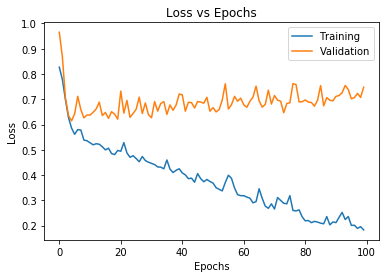

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'])
plt.show()

We see that the model performed a lot better in the training dataset vs the validation dataset, this means that the model is overfitting, and thus not generalizing well.  
To improve the performance, we can use regularisation. We'll try to use l2.

In [89]:
model = Sequential([
    Dense(128, activation = 'relu', input_shape = (train_data.shape[1], )),
    Dropout(0.30),
    Dense(1, kernel_regularizer = tf.keras.regularizers.l2(0.001))
])

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 128)               1408      
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 129       
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.compile(
    optimizer = 'adam',
    loss = 'mae',
    metrics = ['mae']
)

In [91]:
history = model.fit(train_data, train_targets, epochs = 100,
                   validation_split = 0.15, batch_size = 64, verbose = 0)

In [92]:
model.evaluate(test_data, test_targets)

2/2 [==============================] - 0s 2ms/step - loss: 0.5372 - mae: 0.5306


[0.5372364521026611, 0.5306258201599121]

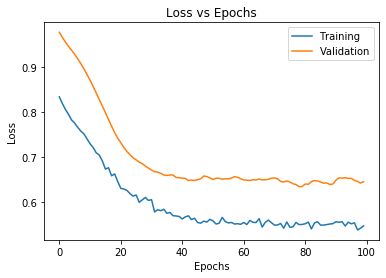

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'])
plt.show()

By regularizing we perform a little worse on our training set, but better on our validation set.